## On a small data

## LOGISTIC REGRESSION

In [1]:
#Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('Social_Network_Ads.csv')
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values


##Splitting into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [3]:
##Model training
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
##Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

##Predicting the test set result
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [5]:
#Evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[65  3]
 [ 8 24]]
89.0 %


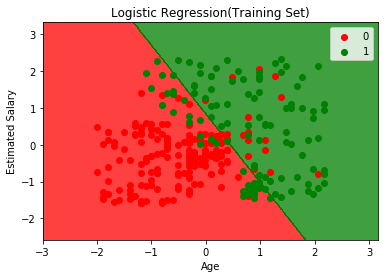

In [15]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

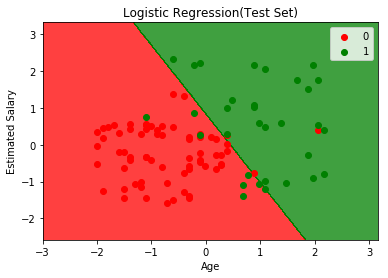

In [16]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## K-NEAREST NEIGHBOURS

In [17]:
#Training the K-NN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
#Predicting a new result
print(classifier1.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier1.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [19]:
#Evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = (confusion_matrix(y_test, y_pred))
print(cm)
score = (accuracy_score(y_test, y_pred))*100
print(score,"%")

[[64  4]
 [ 3 29]]
93.0 %


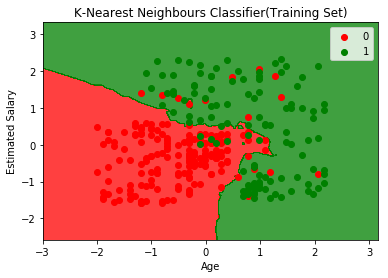

In [21]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier1.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('K-Nearest Neighbours Classifier(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

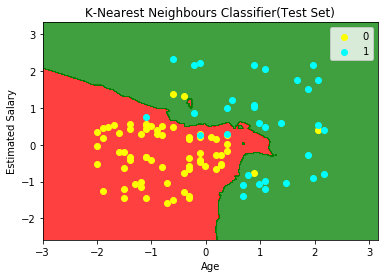

In [23]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier1.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('K-Nearest Neighbours Classifier(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## SUPPORT VECTOR MACHINE

In [24]:
#Model training
from sklearn.svm import SVC
classifier2=SVC(kernel='linear', random_state=0)
classifier2.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
#Predicting a new result
print(classifier2.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier2.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [26]:
#Model performance
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[66  2]
 [ 8 24]]
90.0 %


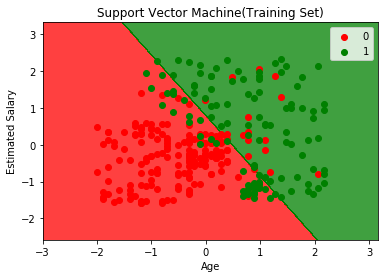

In [27]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Support Vector Machine(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

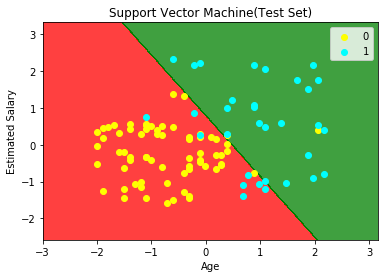

In [29]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Support Vector Machine(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## KERNEL SVM

In [31]:
#Model training
from sklearn.svm import SVC
classifier3=SVC(kernel='rbf', random_state=0)
classifier3.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
#Predicting a new result
print(classifier3.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier3.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [33]:
#Model performance
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[64  4]
 [ 3 29]]
93.0 %


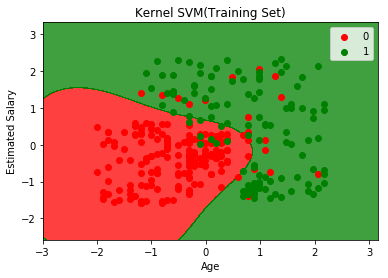

In [34]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Kernel SVM(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

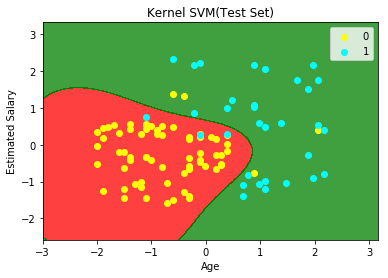

In [35]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Kernel SVM(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## NAIVE BAYES CLASSIFIER

In [36]:
#Model training
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)

GaussianNB(priors=None)

In [37]:
#Predicting a new result
print(classifier4.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier4.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [38]:
#Model performance
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[65  3]
 [ 7 25]]
90.0 %


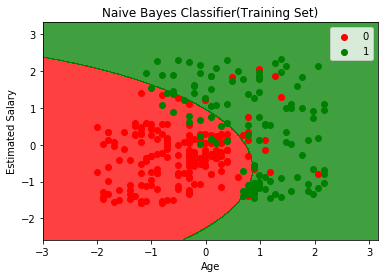

In [39]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier4.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Naive Bayes Classifier(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

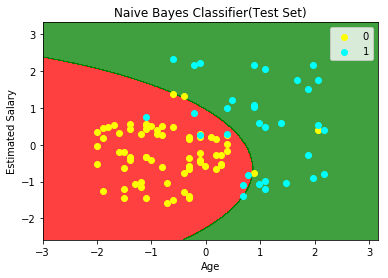

In [40]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier4.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Naive Bayes Classifier(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## DECISION TREE CLASSIFIER

In [42]:
#Model training
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [43]:
#Predicting a new result
print(classifier5.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier5.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [44]:
#Model performance
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[62  6]
 [ 3 29]]
91.0 %


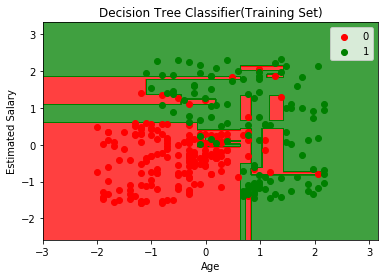

In [45]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier5.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Decision Tree Classifier(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

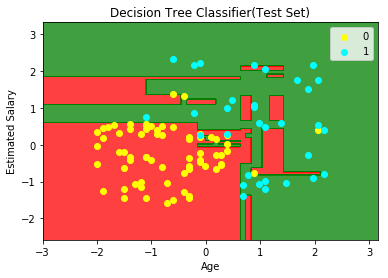

In [46]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier5.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Decision Tree Classifier(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## RANDOM FOREST CLASSIFIER

In [47]:
#Model training
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
#Predicting a new result
print(classifier6.predict(sc.transform([[30,87000]])))

#Predicting the test set result
y_pred=classifier6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [49]:
#Model performance
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[63  5]
 [ 3 29]]
92.0 %


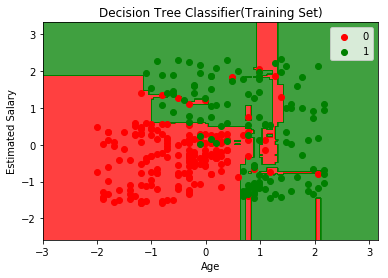

In [50]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier6.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label=j)
plt.title('Decision Tree Classifier(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

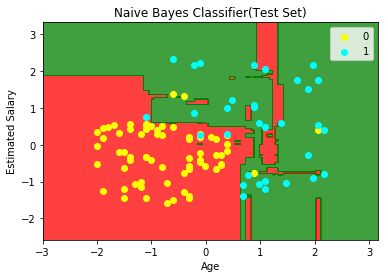

In [51]:
#Visualising test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier6.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Naive Bayes Classifier(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()